<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-04 16:50:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.2’

survey-data.csv.2   100%[===================>] 152.13M  43.4MB/s    in 3.4s    

2025-03-04 16:50:35 (44.2 MB/s) - ‘survey-data.csv.2’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

In [6]:
df_check.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


In [7]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(10), int64(1), object(103)
memory usage: 4.6+ KB


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [8]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [9]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [10]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [11]:
import pandas as pd
import sqlite3

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a Group By Query
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df = pd.read_sql_query(QUERY, conn)

# Display the results
print(df) # added print to display output.

# Close the connection
conn.close()

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [12]:
conn = sqlite3.connect('survey-data.sqlite')

In [13]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


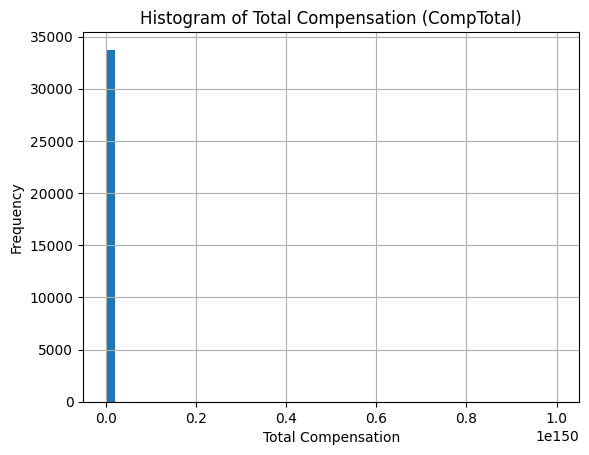

In [14]:
## Write your code here

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Plot a histogram of CompTotal (Total Compensation).
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Plot the histogram
df['CompTotal'].hist(bins=50) # Adjust bins as needed
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

**Box Plots**

Plot a box plot of Age.


In [15]:
!pip install seaborn
import seaborn as sns


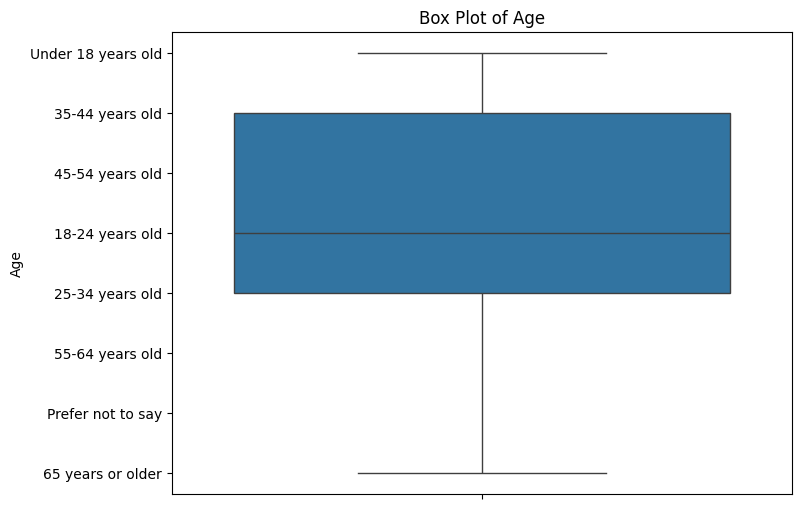

In [16]:
## Write your code here

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for nicer box plots

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Plot a box plot of Age.
QUERY = """
SELECT Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Plot the box plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

# Close the connection
conn.close()



### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


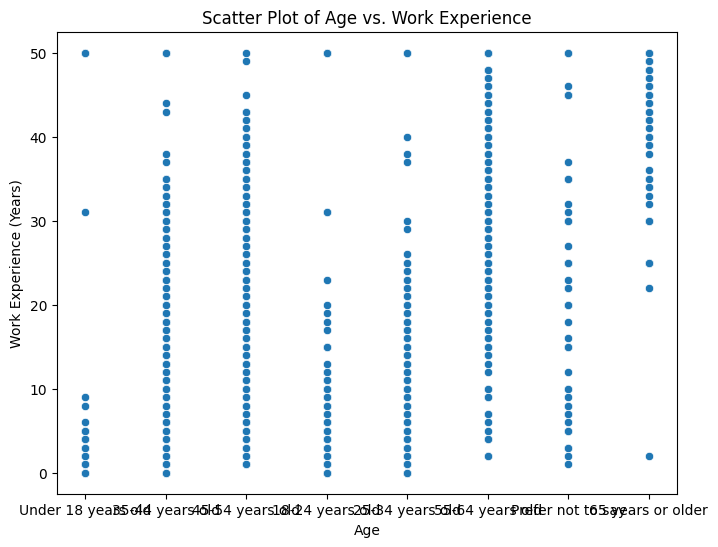

In [17]:
## Write your code here

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for nicer scatter plots

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a scatter plot of Age and WorkExp.
QUERY = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Plot the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x='Age', y='WorkExp', data=df)
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.show()

# Close the connection
conn.close()

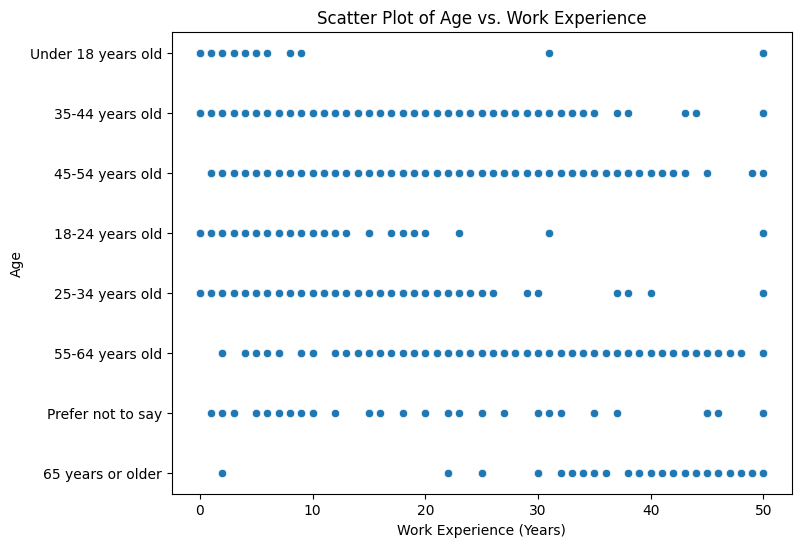

In [18]:
#
# x = WorkExp, Work Experience (Year)
# y = Age

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for nicer scatter plots

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a scatter plot of Age and WorkExp.
QUERY = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Plot the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x='WorkExp', y='Age', data=df)
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Age')
plt.show()

# Close the connection
conn.close()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [ ]:
## Write your code here

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a bubble plot of TimeSearching and Frustration using the Age column as the bubble size.
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Map Age to numerical values for bubble size
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_Numeric'] = df['Age'].map(age_mapping)

# Plot the bubble plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TimeSearching', y='Frustration', \
                size='Age_Numeric', data=df, alpha=0.6)
plt.title('Bubble Plot: Time Searching vs. Frustration (Age as Bubble Size)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.legend(title='Age (Numeric)')
plt.show()

# Close the connection
conn.close()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [ ]:
## Write your code here


import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(DatabaseWantToWorkWith) that respondents wish to learn next year.
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
database_counts = pd.Series(
    [db.strip() for databases in df['DatabaseWantToWorkWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(database_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [ ]:
import pandas as pd
import numpy as np

# Example DataFrame (replace with your actual DataFrame)
data = {'TimeSearching': ['15-30 minutes a day', 'Less than 15 minutes a day', np.nan, '1-2 hours a day']}
df = pd.DataFrame(data)

# Mapping strings to numeric values
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '1-2 hours a day': 90,
    '2-4 hours a day': 180,
    '4+ hours a day': 240
}

# Apply mapping and handle NaN
df['TimeSearching_Numeric'] = df['TimeSearching'].map(time_mapping)
df['TimeSearching_Numeric'].fillna(0, inplace=True)  # Replace NaN with 0

print(df)

In [ ]:
import pandas as pd
import numpy as np

# Example DataFrame (replace with your actual DataFrame)
data = {'Numeric_Column': ['10', '20', 'invalid', np.nan]}
df = pd.DataFrame(data)

# Convert to numeric, coercing errors to NaN
df['Numeric_Column'] = pd.to_numeric(df['Numeric_Column'], errors='coerce')

# Handle NaN values (if needed)
df['Numeric_Column'].fillna(0, inplace=True)

print(df)

In [ ]:
# Stacked Charts
#
# Create a stacked bar chart of median TimeSearching and TimeAnswering for the age group 30 to 35.
#
# case 2
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a stacked bar chart of median TimeSearching and TimeAnswering for the age group 30 to 35.
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age = '25-34 years old'
"""
df = pd.read_sql_query(QUERY, conn)

# Mapping TimeSearching and TimeAnswering to numeric values
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '1-2 hours a day': 90,
    '2-4 hours a day': 180,
    '4+ hours a day': 240
}

# Apply mapping and handle NaN
df['TimeSearching_Numeric'] = df['TimeSearching'].map(time_mapping)
df['TimeSearching_Numeric'].fillna(0, inplace=True)

df['TimeAnswering_Numeric'] = df['TimeAnswering'].map(time_mapping)
df['TimeAnswering_Numeric'].fillna(0, inplace=True)

# Calculate medians
median_time_searching = df['TimeSearching_Numeric'].median()
median_time_answering = df['TimeAnswering_Numeric'].median()

# Create data for the stacked bar chart
data = {
    'TimeSearching': median_time_searching,
    'TimeAnswering': median_time_answering
}

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Age 25-34'], [data['TimeSearching']], label='Time Searching', color='skyblue')
plt.bar(['Age 25-34'], [data['TimeAnswering']], bottom=[data['TimeSearching']], label='Time Answering', color='lightcoral')

plt.title('Median Time Searching and Time Answering (Age 25-34)')
plt.ylabel('Median Time (Minutes)')
plt.legend()
plt.show()

# Close the connection
conn.close()

In [ ]:
# Stacked Charts
#
# Create a stacked bar chart of median TimeSearching and TimeAnswering for the age group 30 to 35.
#
# case 3

## Write your code here

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a stacked bar chart of median TimeSearching and TimeAnswering for the age group 30 to 35.
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age = '30-35 years old'
"""
df = pd.read_sql_query(QUERY, conn)

# Calculate medians
median_time_searching = df['TimeSearching'].median()
median_time_answering = df['TimeAnswering'].median()

# Create data for the stacked bar chart
data = {
    'TimeSearching': median_time_searching,
    'TimeAnswering': median_time_answering
}

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Age 25-34'], [data['TimeSearching']], label='Time Searching', color='skyblue')
plt.bar(['Age 25-34'], [data['TimeAnswering']], bottom=[data['TimeSearching']], label='Time Answering', color='lightcoral')

plt.title('Median Time Searching and Time Answering (Age 25-34)')
plt.ylabel('Median Time (Hours)')
plt.legend()
plt.show()

# Close the connection
conn.close()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [ ]:
## Write your code here


import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Plot the median CompTotal for all ages from 45 to 60.
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old') AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Map Age to a numerical value for sorting and plotting
age_mapping = {
    '45-54 years old': 50,
    '55-64 years old': 60
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Calculate median CompTotal for each age group
median_comp = df.groupby('Age_Numeric')['CompTotal'].median()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.title('Median Total Compensation (CompTotal) for Ages 45-60')
plt.xlabel('Age')
plt.ylabel('Median Total Compensation')
plt.xticks(list(age_mapping.values()), list(age_mapping.keys())) # Set x-ticks to age labels
plt.grid(True)
plt.show()

# Close the connection
conn.close()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a horizontal bar chart using the MainBranch column.
QUERY = """
SELECT MainBranch
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each MainBranch value
branch_counts = df['MainBranch'].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(branch_counts.index, branch_counts.values)
plt.title('Distribution of Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis() # Invert y-axis to show the most frequent at the top
plt.show()

# Close the connection
conn.close()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
